In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
utmb_data= pd.read_csv("compare.csv")[["Portien","rateconst"]]
utmb_list= pd.read_csv("Protein_List.utmb.0311_2022.csv")[["Entry","Entry name","Gene names"]]
utmb_data=utmb_data.merge(utmb_list,left_on=["Portien"],right_on=["Entry name"])[["Entry","Entry name",
                                                                                  "rateconst","Gene names"]]
print(utmb_data.shape)
utmb_data.head()

(1786, 4)


,Entry,Entry name,rateconst,Gene names
0,Q9CQV8,1433B_MOUSE,0.309584,Ywhab
1,P62259,1433E_MOUSE,0.299214,Ywhae
2,P68510,1433F_MOUSE,0.379755,Ywhah
3,P61982,1433G_MOUSE,0.373152,Ywhag
4,P68254,1433T_MOUSE,0.557099,Ywhaq


In [3]:
Liver15N2H_GVB_Mouse=pd.read_csv("Liver.Proteins.Turnover.15N.and.2H.GVB_Mouse.csv",skiprows=1)[["Uniprot Gene Name","k0",'# Total Peptides']]
print(Liver15N2H_GVB_Mouse.shape)
Liver15N2H_GVB_Mouse.head()

(1329, 3)


,Uniprot Gene Name,k0,# Total Peptides
0,LPP60_MOUSE,0.805279,2
1,FGGY_MOUSE,0.126051,4
2,SPEB_MOUSE,0.123579,6
3,DHTK1_MOUSE,0.141873,40
4,TOM5_MOUSE,0.129240,1


In [4]:
utmb_Liver15N2H_GVB_Mouse=Liver15N2H_GVB_Mouse.merge(utmb_data,left_on=["Uniprot Gene Name"],right_on=["Entry name"])
print(utmb_Liver15N2H_GVB_Mouse.shape)
utmb_Liver15N2H_GVB_Mouse.head()

(1101, 7)


,Uniprot Gene Name,k0,# Total Peptides,Entry,Entry name,rateconst,Gene names
0,LPP60_MOUSE,0.805279,2,A0JNU3,LPP60_MOUSE,0.732540,Aspg
1,FGGY_MOUSE,0.126051,4,A2AJL3,FGGY_MOUSE,0.291233,Fggy
2,SPEB_MOUSE,0.123579,6,A2AS89,SPEB_MOUSE,0.134101,Agmat
3,DHTK1_MOUSE,0.141873,40,A2ATU0,DHTK1_MOUSE,0.251565,Dhtkd1 Kiaa1630
4,SC22B_MOUSE,0.202260,9,O08547,SC22B_MOUSE,0.294941,Sec22b Sec22l1


In [5]:
# corr= utmb_Liver15N2H_GVB_Mouse[['k0','rateconst']].corr()
# corr

## 1. No Filter

Text(0, 0.5, 'UTMB')

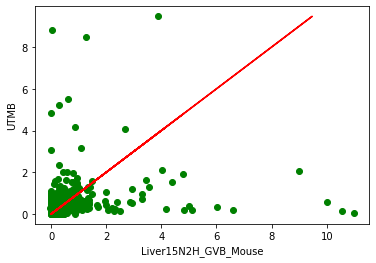

In [6]:
plt.scatter(utmb_Liver15N2H_GVB_Mouse.k0,utmb_Liver15N2H_GVB_Mouse.rateconst,c='g')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.plot(utmb_Liver15N2H_GVB_Mouse.rateconst,utmb_Liver15N2H_GVB_Mouse.rateconst,c='r')
plt.ylabel("UTMB")

(830, 7)


Text(0, 0.5, 'UTMB')

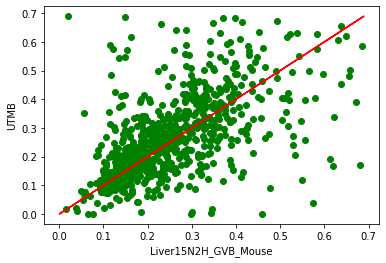

In [7]:
temp= utmb_Liver15N2H_GVB_Mouse[(utmb_Liver15N2H_GVB_Mouse.k0<=0.7)&(utmb_Liver15N2H_GVB_Mouse.k0>0) & 
                                (utmb_Liver15N2H_GVB_Mouse.rateconst<=0.7)&(utmb_Liver15N2H_GVB_Mouse.rateconst>0)]
print(temp.shape)
plt.scatter(temp.k0,temp.rateconst,c='g')
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")

In [8]:
corr= temp[['k0','rateconst']].corr()
corr

,k0,rateconst
k0,1.000000,0.605684
rateconst,0.605684,1.000000


## 2. Total No. Peptides > 3

(880, 7)


Text(0, 0.5, 'UTMB')

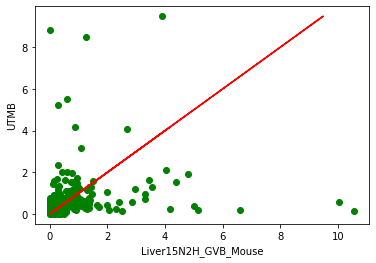

In [9]:
temp=utmb_Liver15N2H_GVB_Mouse[utmb_Liver15N2H_GVB_Mouse['# Total Peptides']>=3]
print(temp.shape)
# temp= utmb_Liver15N2H_GVB_Mouse[(utmb_Liver15N2H_GVB_Mouse.k0<1.5)&(utmb_Liver15N2H_GVB_Mouse.k0>0) & 
#                                 (utmb_Liver15N2H_GVB_Mouse.rateconst<1.5)&(utmb_Liver15N2H_GVB_Mouse.rateconst>0)]
plt.scatter(temp.k0,temp.rateconst,c='g') 
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")

In [10]:
corr= temp[['k0','rateconst']].corr()
corr

,k0,rateconst
k0,1.000000,0.262132
rateconst,0.262132,1.000000


(728, 7)
corr 0.670949074252783


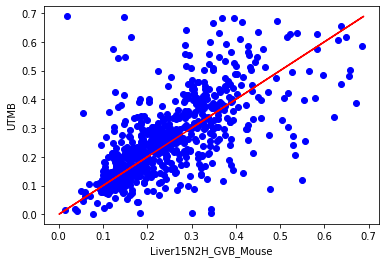

<Figure size 648x504 with 0 Axes>

In [29]:
temp=utmb_Liver15N2H_GVB_Mouse[utmb_Liver15N2H_GVB_Mouse['# Total Peptides']>=3]

temp= temp[(temp.k0<=0.7)&(temp.k0>0) & 
                                (temp.rateconst<=0.7)&(temp.rateconst>0)]
print(temp.shape)
plt.scatter(temp.k0,temp.rateconst,c='b')
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(7)
corr= temp[['k0','rateconst']].corr()
print("corr",corr['k0']['rateconst'])

(437, 7)
corr 0.8064090117665829


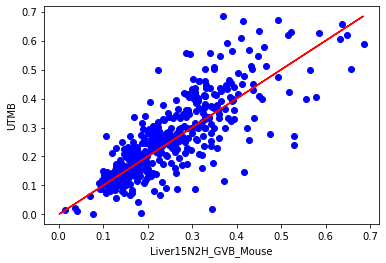

<Figure size 648x504 with 0 Axes>

In [30]:
temp=utmb_Liver15N2H_GVB_Mouse[utmb_Liver15N2H_GVB_Mouse['# Total Peptides']>=8]

temp= temp[(temp.k0<=0.7)&(temp.k0>0) & 
                                (temp.rateconst<=0.7)&(temp.rateconst>0)]
print(temp.shape)
plt.scatter(temp.k0,temp.rateconst,c='b')
plt.plot(temp.rateconst,temp.rateconst,c='r')
plt.xlabel("Liver15N2H_GVB_Mouse")
plt.ylabel("UTMB")
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(7)
corr= temp[['k0','rateconst']].corr()
print("corr",corr['k0']['rateconst'])

## 3. List of Nan values

In [13]:
utmb_Liver15N2H_GVB_Mouse=Liver15N2H_GVB_Mouse.merge(utmb_data,left_on=["Uniprot Gene Name"],
                                                     right_on=["Entry name"],how='right')
print(utmb_Liver15N2H_GVB_Mouse.shape)
utmb_Liver15N2H_GVB_Mouse.head()

(1786, 7)


,Uniprot Gene Name,k0,# Total Peptides,Entry,Entry name,rateconst,Gene names
0,1433B_MOUSE,0.885953,8.0,Q9CQV8,1433B_MOUSE,0.309584,Ywhab
1,1433E_MOUSE,0.312108,11.0,P62259,1433E_MOUSE,0.299214,Ywhae
2,1433F_MOUSE,0.141443,6.0,P68510,1433F_MOUSE,0.379755,Ywhah
3,1433G_MOUSE,0.134781,6.0,P61982,1433G_MOUSE,0.373152,Ywhag
4,1433T_MOUSE,0.000000,7.0,P68254,1433T_MOUSE,0.557099,Ywhaq


In [14]:
nans=utmb_Liver15N2H_GVB_Mouse[ pd.isna(utmb_Liver15N2H_GVB_Mouse.k0)]
print(nans.shape)
nans.head(50)

(685, 7)


,Uniprot Gene Name,k0,# Total Peptides,Entry,Entry name,rateconst,Gene names
6,NaN,NaN,NaN,Q61151,2A5E_MOUSE,0.309550,Ppp2r5e Kiaa4006
8,NaN,NaN,NaN,P26150,3BHS3_MOUSE,0.525015,Hsd3b3
9,NaN,NaN,NaN,Q61767,3BHS4_MOUSE,0.128268,Hsd3b4
11,NaN,NaN,NaN,Q9EQC1,3BHS7_MOUSE,0.496642,Hsd3b7
17,NaN,NaN,NaN,P07758,A1AT1_MOUSE,0.907065,Serpina1a Dom1 Spi1-1
20,NaN,NaN,NaN,Q00898,A1AT5_MOUSE,1.723492,Serpina1e Dom5 Spi1-5
25,NaN,NaN,NaN,Q9R078,AAKB1_MOUSE,0.146805,Prkab1
26,NaN,NaN,NaN,O54950,AAKG1_MOUSE,0.157372,Prkag1 Prkaac
30,NaN,NaN,NaN,Q8K440,ABC8B_MOUSE,0.204393,Abca8b Abca8 Kiaa0822
32,NaN,NaN,NaN,Q61102,ABCB7_MOUSE,0.122096,Abcb7 Abc7
